## Runge-Kutta methods for solving DE's



In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def rk2 (y , time , dt , derivs ) :
    """
    This function moves the value of 'y' forward by a single
    step of size 'dt', using a second-order Runge-Kutta
    algorithm. This particular algorithm is equivalent to
    f i n d i n g the average of the s l o p e at t ime t and at t ime
    ( t+dt ) , and using t h a t average s l o p e to f i n d the new
    value of y .
    """
    k0 = dt*derivs(y , time )
    k1 = dt*derivs( y + k0 , time + dt )
    ynext = y + 0.5*( k0 + k1 )
    return ynext

In [5]:
def kin(y, time, x0, v0, a):
    """ 
    Function to calculate position and velocity from the kinematic eqn
    """
    x=x0+v0*time+0.5*a*time**2
    v=v0+a*time
    y[0]=x
    y[1]=v
    
    

In [11]:
def euler(y, t, dt, derivs):
    """A routine that implements Euler ’s method of finding the new ’state’ 
    of y, given the current state, time, and desired time step . ’ derivs ’ 
    must be a function that returns the derivatives of y and thus defines 
    the differential equation."""    
    y_next = y + derivs(y,t) * dt 
    return y_next

In [14]:
def FreeFall(state , time):
    """This function defines the ODE dˆ2x/dtˆ2 =  g.
    It takes the vector y and returns another vector containing the 
    derivatives of each element in the current state of the system.
    The first element in state is position x, and the derivative of x 
    is velocity , v. So the first element in the return vector is v, 
    which is the second element in state .
    The second element in state is v, and the derivative of v is  g 
    for free fall . The result is returned as a numpy array so the 
    rest of the program can do vector math."""
    g0 = state[1]
    g1 =  -9.8
    return array([g0, g1])

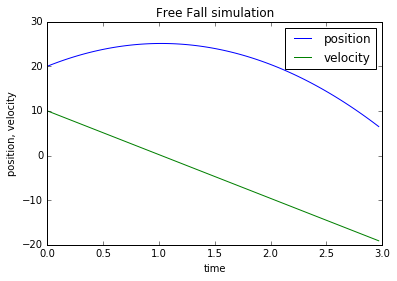

In [20]:
# test kin function
N = 100
tau = 3.0
time = linspace(0, tau, N)
x0=20
v0=10
a=-9.8
y = zeros([N,2]) # the state vector
y[0,0] = x0
y[0,1] = v0

for j in range(N-1):
    y[j+1] = kin(y[j], time[j], x0, v0, a)

xdata = [y[j,0] for j in range(N)] 
vdata = [y[j,1] for j in range(N)]
plot(time, xdata, label="position")
plot(time, vdata, label="velocity")
title('Free Fall simulation')
xlabel ("time")
ylabel("position, velocity")
legend()


(40, 50)

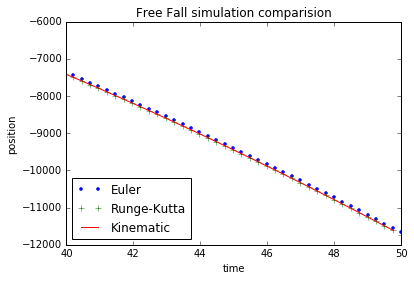

In [48]:
# compare behavior of Runge-Kutta to Euler's Method for free fall
#
N = 200
xo = 20.0
vo = 10.0
tau = 50.0
dt = tau/float(N-1)

# number of steps to take 
# initial position
# initial velocity
# total time for the simulation , in seconds. 
# time step

# Since we’re plotting vs t , we need time for that plot.

time = linspace(0, tau, N)


"""Create a Nx2 array for storing the results of our calculations. 
Each 2 element row will be used for the state of the system at one 
instant , and each instant is separated by time dt. The first element 
in each row will be position, the second velocity."""
y = zeros([N,2]) # the state vector
y[0,0] = xo
y[0,1] = vo

# create array for holding Runge-Kutta results
yrk = zeros([N,2]) # the state vector
yrk[0,0] = xo
yrk[0,1] = vo

# create array to hold exact results from kin eqn
ykin = zeros([N,2]) # the state vector
ykin[0,0] = xo
ykin[0,1] = vo

# create array to hold differences between solutions
diffrk = zeros([N,2]) 
diffeuler = zeros([N,2])
diffrk[0,0]=0
diffrk[0,1]=0
diffeuler[0,0]=0
diffeuler[0,1]=0

# Now we do the calculations.
# Loop only to N-1 so that we don’t run into a problem addressing y[N+1] 
# on the last point.

for j in range(N-1):
    
    # We give the euler routine the current state y[j], the time 
    # (which we don’t care about at all in this ODE) the time step dt, and 
    # the derivatives function FreeFall().
    y[j+1] = euler(y[j], time[j], dt, FreeFall)
    yrk[j+1]=rk2(yrk[j], time[j], dt, FreeFall)
    ykin[j+1]=kin(ykin[j], time[j], xo, vo, -9.8)
    diffrk[j+1]=ykin[j+1]-yrk[j+1]
#    print(ykin[j+1])
    diffeuler[j+1]=ykin[j+1]-y[j+1]


# That’s it for calculations! Now graph the results .
# start by pulling out what we need from y.

xdata = [y[j,0] for j in range(N)] 
vdata = [y[j,1] for j in range(N)]

xrkdata = [yrk[j,0] for j in range(N)] 
vrkdata = [yrk[j,1] for j in range(N)]

xkindata = [ykin[j,0] for j in range(N)] 
vkindata = [ykin[j,1] for j in range(N)]

plot(time, xdata,'.b', time,xrkdata,'g+', time, xkindata,'r-', label="position")
#plot(time, vdata, label="velocity")
title('Free Fall simulation comparision')
xlabel ("time")
ylabel("position")
legend(['Euler','Runge-Kutta','Kinematic'],loc=3)
#ylim(20,27)
#xlim(0,1.5)
ylim(-12000, -6000)
xlim(40,50)



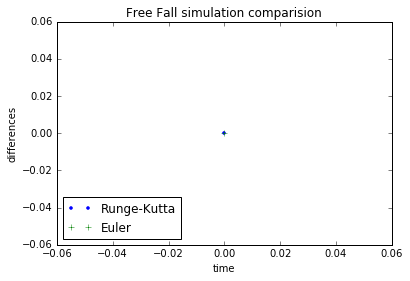

In [37]:
# find difference between solutions

xdiffrk = [diffrk[j,0] for j in range(N)] 
xdiffeuler= [diffeuler[j,0] for j in range(N)] 

plot(time, xdiffrk,'.b', time,xdiffeuler,'g+', label="position")
#plot(time, vdata, label="velocity")
title('Free Fall simulation comparision')
xlabel ("time")
ylabel("differences")
legend(['Runge-Kutta','Euler'],loc=3)


